In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def criadataset(n = 20):
    X = np.random.uniform(size = (n,2))
    y = np.array(X[:,0] > X[:,1],dtype=int)*2-1
    return X,y

In [4]:
Xtr,ytr = criadataset(20)

In [5]:
from sklearn.base import BaseEstimator,ClassifierMixin

In [10]:
import random

class Perceptron(BaseEstimator,ClassifierMixin):
    def __init__(self,max_iter=100):
        self.w = None
        self.activation = lambda a: (a > 0) * 2-1
        self.max_iter = max_iter
        self.custoonline = []
        self.iteronline = []
        self.custobatch = []
        self.iterbatch = []
        
    def predict(self,X,y=None):
        a = X @ self.w
        np.matmul(X,self.w)
        ypred = self.activation(a)
        return ypred
    
    def fit(self,X,y):
        self.w = np.random.uniform(-1,1,size=X.shape[1])
        indexes = list(range(X.shape[0]))
        #forma online de encontrar os erros
        for j in range(self.max_iter):
            any_error = False
            erros = []
            for i in sorted(indexes,key=lambda k: random.random()):
                x = X[i,:]
                ypred = self.predict(x)
                erro = y[i]-ypred
                erros.append(erro)
                if erro != 0:
                    any_error = True
                self.w+=erro * x
            custo = sum(np.array(erros) ** 2)
            self.custoonline.append(custo)
            self.iteronline.append(j)            
            if not any_error:
                break
            print(j)
            
    def fitbatch(self,X,y):
        self.w = np.random.uniform(-1,1,size=X.shape[1])
        indexes = list(range(X.shape[0]))
        
        #forma batch de encontrar os erros
        for j in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros ** 2)
            self.custobatch.append(custo)
            self.iterbatch.append(j)
            if custo == 0:
                break
            self.w += X.T @ erros

0
1
[0, 1, 2] [24, 24, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [32, 28, 20, 52, 24, 16, 32, 20, 4, 0]


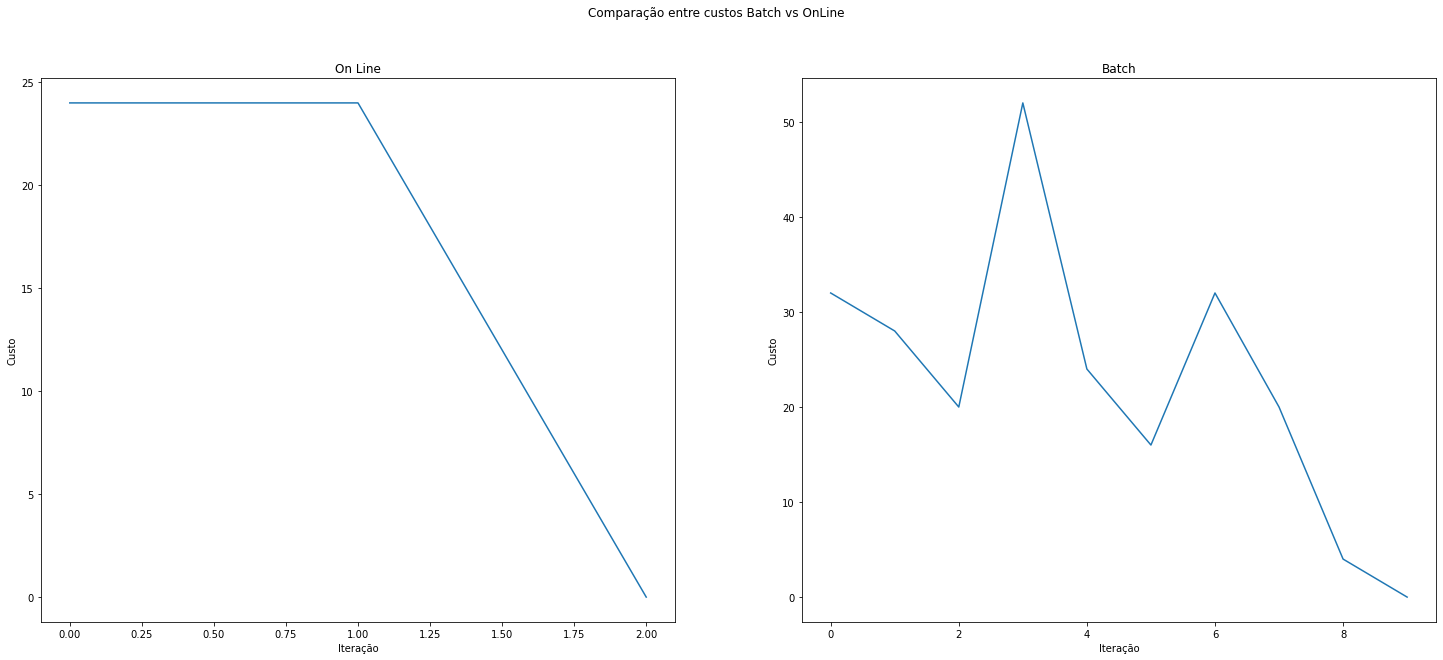

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(25, 10)
fig.suptitle('Comparação entre custos Batch vs OnLine')
#Verificando redução de custo na implementação on-line
perceptron = Perceptron()
perceptron.fit(Xtr,ytr)
print(perceptron.iteronline,perceptron.custoonline)
ax1.title.set_text('On Line')
ax1.set_xlabel('Iteração')
ax1.set_ylabel('Custo')
ax1.plot(perceptron.iteronline,perceptron.custoonline)
#Verificando redução de custo na implementação em Batch
perceptron = Perceptron()
perceptron.fitbatch(Xtr,ytr)
print(perceptron.iterbatch,perceptron.custobatch)
ax2.title.set_text('Batch')
ax2.set_xlabel('Iteração')
ax2.set_ylabel('Custo')
ax2.plot(perceptron.iterbatch,perceptron.custobatch)

**Implementação Online**
Esta implementação é uma boa opção para contornar a limitação de recurso (como memória) no momento do treinamento, pois recebe dados como um fluxo contínuo e portanto pode convergir para o resultado com poucas iterações. O gráfico acima compara a redução de custos da implementação online com a implementação em Batch. Como podemos perceber, a redução de custos na implementação online é mais rápida do que na implementação em Batch
**Implementação em Batch**
Este tipo de implementação converge mais devagar, pois utiliza todos os dados da base para fazer o treinamento. Conforme pode ser visto na comparação do gráfico acima, é necessário mais iterações para redução dos custos.